# Центральная предельная теорема своими руками
## Цели: 
- проверить работу центральной предельной теоремы
- поработать с генерацией случайных чисел и построением графиков в Python 


## Задание 1
> Выберите ваше любимое непрерывное распределение . Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины.

## Выполнение:

*Объявление необходимых библиотек:*

In [149]:
import numpy as np
import array
import matplotlib.pyplot as plt
import scipy.stats as sts
import random
import math
%matplotlib inline

*Для выполнения задания я выбрала непрерывное распределение Максвелла, в параметры метода были переданны следущие значения: математическое ожидание равное 0, а дисперсия равное 2:*

In [141]:
maxwell=sts.maxwell(0,2)

*В метод rvs передаем объем выборки, в данном случае 1000*

In [142]:
maxwell_1000=maxwell.rvs(size=1000)

*Строим гистограмму выборки с помощью функции hist, в параметры которой передается массив точек, количество столбцов в гистограмме.
С помощью функции plot, строим функцию плотности распределения, используя функцию pdf, и параметр x, который указывает промежуток значений на оси абцисс, и количество точек*

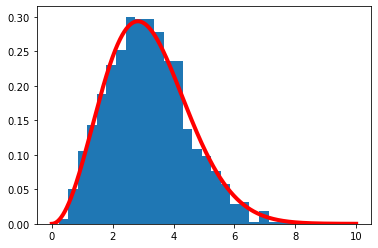

In [143]:
x = np.linspace(0,10,1000)
plt.hist(maxwell_1000, bins=25, density=True) 
plt.plot(x, maxwell.pdf(x), color='red', lw=4)

## Задание 2
> При трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. 

*Создам функцию, на вход которой поступает объем выборки. В функции сгенерирую 1000 выборок объёма с помощью цикла for, для каждой из выборки вычислю выборочную среднюю,и каждое новое значение выборочной средней запишу в массив, далее построю гистограмму распределений их выборочных средних.*

In [144]:
def task_2(n):
    medium_array=array.array("f",[])
    for i in range(1000):
        maxwell_n=maxwell.rvs(size=n)
        medium_array.append(maxwell_n.mean())
    plt.hist(medium_array, bins=40, density=True) 
    

*Проверка работоспособности вышенаписанной функции:*

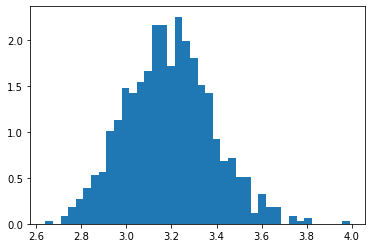

In [164]:
task_2(50)

*Задание нормального распределения, а также построение диаграммы выборочных средних:*

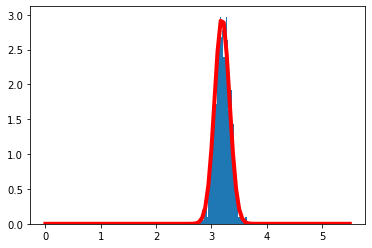

In [163]:
n=100
ME=maxwell.mean();
DX=maxwell.std()**2;
norm_rv = sts.norm(loc=ME, scale=math.sqrt(DX/n))
x = np.linspace(0,5.5,100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf,color='red', lw=4)
task_2(n)
   

### Вывод: 
    Распределение выборочных средних для функции Максвелла хорошо описывается нормальным распределением. С ростом n точность аппроксимации увеличивается.
